<a href="https://colab.research.google.com/github/w2k31984/Analisis-de-precios-habitaciones-de-Hoteles/blob/master/Fijaci%C3%B3n_de_precios_de_habitaciones_de_hoteles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas
print('Libreria importada con exito!')

Libreria importada con exito!


In [3]:
from google.colab import drive
drive.mount('/content/drive')
datos = pd.read_csv('/content/drive/MyDrive/Data_Science/Estadistica_Python/hoteis.csv')
datos.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Estadistica_Python/hoteis.csv')

In [6]:
df.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


## Paso 1: Analisis con PairPlot

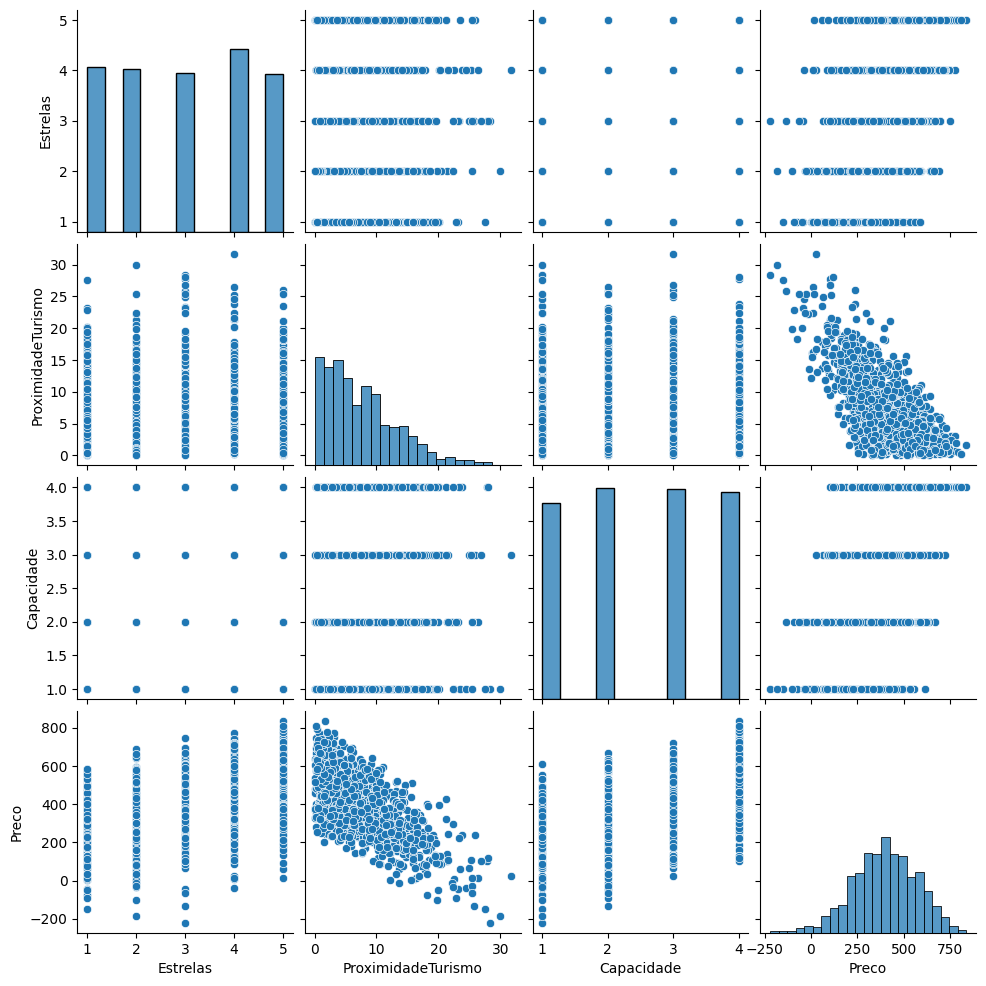

In [8]:
sns.pairplot(df)

## Paso 2: Construimos los modelos de regresion lineal.

In [10]:
import statsmodels.api as sm
print('Libreria importada con exito!')

Libreria importada con exito!


In [37]:
# Modelo 0: Utilizando apenas 'Estrelas'
X1 = df[['Estrelas']]
X1 = sm.add_constant(X1)  # Adicionando la constante
y = df['Preco']
modelo_0 = sm.OLS(y, X1).fit()

# Modelo 1: Utilizando 'Estrellas' y 'Proximidad de Turismo'
X2 = df[['Estrelas', 'ProximidadeTurismo']]
X2 = sm.add_constant(X2)
modelo_1 = sm.OLS(y, X2).fit()

# Modelo 2: Utilizando 'Estrellas', 'Proximidad de Turismo' y 'Capacidad'
X3 = df[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X3 = sm.add_constant(X3)
modelo_2 = sm.OLS(y, X3).fit()

# Modelo 3: Utilizando 'Estrelas', 'Proximidad de Turismo' y 'Precio'
X3 = df[['Estrelas', 'ProximidadeTurismo','Preco']]
X3 = sm.add_constant(X3)
modelo_3 = sm.OLS(y, X3).fit()

## Paso 3: Comparacion de los modelos.

In [38]:
# creamos una lista en python de todos los modelos.
modelos=[modelo_0,modelo_1,modelo_2,modelo_3]
for i,j in enumerate(modelos):
          print(f'****************************************************************************\n*******************El modelo {i} Tiene el siguiente resumen*******************\n**********************************************************************')
          print(j.summary(), '\n\n')


****************************************************************************
*******************El modelo 0 Tiene el siguiente resumen*******************
**********************************************************************
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           6.09e-40
Time:                        21:20:51   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                           

In [33]:
for i,j in enumerate(modelos):
   print(f'El coeficiente de determinacion de R² del modelo {i}:{j.rsquared.round(2)}')

El coeficiente de determinacion de R² del modelo 0:0.16
El coeficiente de determinacion de R² del modelo 1:0.65
El coeficiente de determinacion de R² del modelo 2:0.92
El coeficiente de determinacion de R² del modelo 3:1.0


In [36]:
#Comparando los modelos
#Cuál es el modelo?
modelo_2.params

,0
const,192.844250
Estrelas,50.874974
ProximidadeTurismo,-20.046232
Capacidade,81.026781


# Comparativas y comentarios de los modelos.

In [40]:
#Cargamos la tabla de comparacion entre modelos.
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Estadistica_Python/tabla_comparativa_modelos.csv')
df

,Modelo,Variables,R²,Adj R²,F-statistic,Notas
0,0,Estrelas,0.161,0.160,1.913000e+02,Muy básico
1,1,Estrelas + ProximidadeTurismo,0.650,0.649,9.251000e+02,Mejora significativa
2,2,Estrelas + ProximidadeTurismo + Capacidade,0.923,0.923,3.981000e+03,Muy buen ajuste
3,3,Estrelas + ProximidadeTurismo + Preco,1.000,1.000,2.440000e+32,Inválido (data leakage)


📌 Conclusiones y Recomendaciones: <br>
✅ Mejor modelo: Modelo 2 <br>
* Explica el 92.3% de la variabilidad del precio.
* Incluye tres variables relevantes:
Número de estrellas (Estrelas)
Proximidad al turismo (ProximidadeTurismo)
Capacidad del hotel (Capacidade)
*Todos los coeficientes son significativos.
*No presenta problemas graves de colinealidad (Cond. No. = 37.3).

❌ Peor modelo: Modelo 3<br>
* Aunque estadísticamente parece perfecto, no tiene valor predictivo real .
* Usa la variable objetivo como predictor → data leakage .
* Debe evitarse en cualquier análisis predictivo serio.

⚠️ Modelo 1: <br>
* Buena base, pero falta explicar casi el 35% de la variabilidad .
* Puede servir como modelo intermedio si se busca simplicidad.

⚠️ Modelo 0:<br>
* Muy limitado, solo explica el 16% de la variabilidad.
Útil solo como referencia básica.

📈 Interpretación de los coeficientes (Modelo 2):<br>

* const = 192.84: Precio base promedio cuando todas las variables son cero.
* Estrellas = 50.88: Cada estrella adicional incrementa el precio en ~50.88 unidades.
* Proximidad de Turismo = -20.05: Cuanto más cerca está del turismo, menos vale el hotel. Esto puede ser un hallazgo o un error en los datos.
* Capacidad = 81.03: Una unidad más de capacidad incrementa el precio en ~81 unidades.

🧠 ¿Qué hacer ahora?<br>
* Variable dependiente (Y): Preco (Precio)
* Variables independientes (X): Estrellas, Proximidad de Turismo, Capacidad.

Para visualizar y validar los supuestos del modelo de regresión lineal, vamos a analizar los residuos del modelo. Los supuestos básicos de una regresión lineal son:

* Linealidad: La relación entre las variables independientes y la dependiente es lineal.
* Homocedasticidad: Los residuos tienen varianza constante.
* Normalidad: Los residuos siguen una distribución normal.
* Independencia: No hay autocorrelación entre residuos (no es un problema en este caso si los datos no son temporales).
*Ausencia de multicolinealidad severa: Ya que el modelo tiene un Cond. No. de 37.3, no parece haber problemas graves.

🧪 1. Cargar los residuos del Modelo 2
Suponiendo que ya tienes ajustado el modelo con statsmodels, puedes obtener los residuos así:

In [48]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo de datos (reemplaza con tus datos reales)
# df = pd.read_csv("tu_archivo.csv")

# Variables del Modelo 2
X = datos[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X = sm.add_constant(X)  # Añade constante
y = datos['Preco']

# Ajustar modelo
modelo_2 = sm.OLS(y, X).fit()
residuos = modelo_2.resid
predicciones = modelo_2.predict(X)

📈 2. Gráficos para Validar los Supuestos
🔹 2.1 Gráfico de Residuos vs. Valores Ajustados (Homocedasticidad)

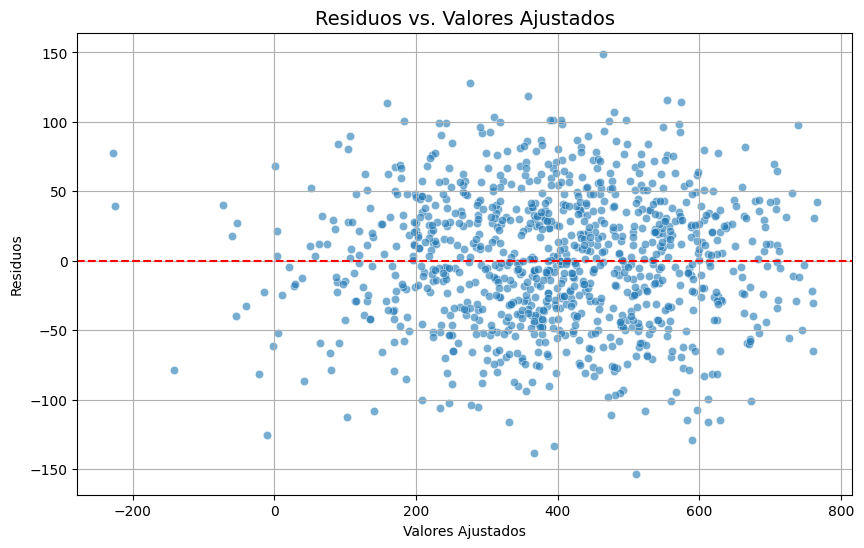

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicciones, y=residuos, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs. Valores Ajustados', fontsize=14)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

**Interpretacion del grafico** <br>
* Si los residuos están distribuidos aleatoriamente alrededor de cero sin patrones claros, el modelo cumple con la linealidad y homocedasticidad.
* Si hay un patrón (como forma de cono), podría haber heterocedasticidad.

🔹 2.2 Histograma y QQ-Plot de los Residuos (Normalidad)

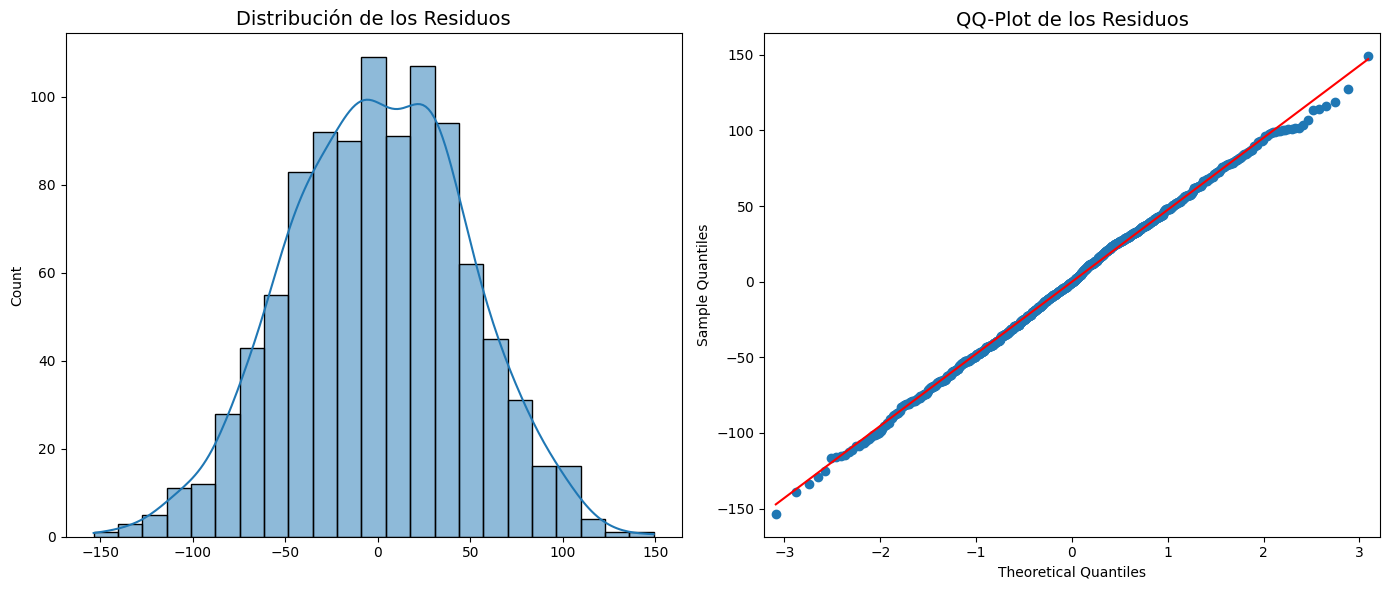

In [56]:
from statsmodels.graphics.gofplots import qqplot

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma
sns.histplot(residuos, kde=True, ax=axes[0])
axes[0].set_title('Distribución de los Residuos', fontsize=14)

# QQ-Plot
qqplot(residuos, line='s', ax=axes[1])
axes[1].set_title('QQ-Plot de los Residuos', fontsize=14)

plt.tight_layout()
plt.show()

**Interpretacion del grafico**<br>
* El histograma debe parecerse a una campana de Gauss.
* En el QQ-Plot, los puntos deben estar cerca de la línea diagonal → normalidad.

🔹 2.3 Gráfico de Residuos vs. Cada Variable Predictora (Linealidad)

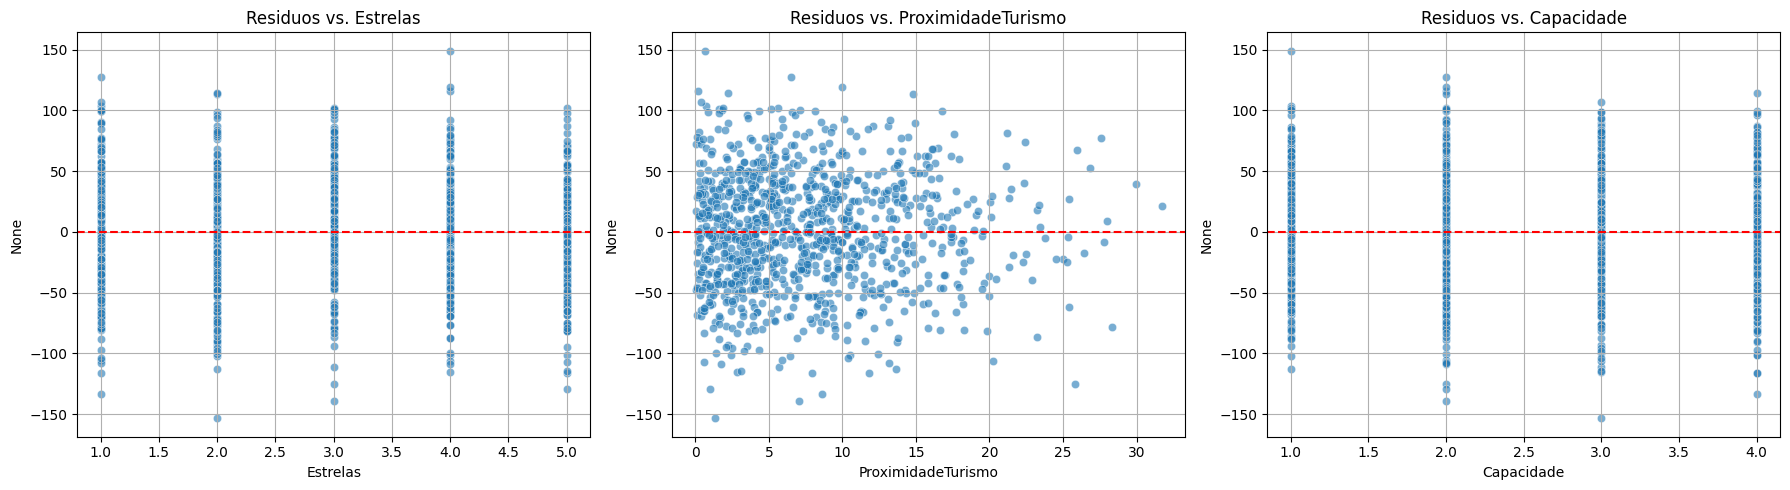

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

variables = ['Estrelas', 'ProximidadeTurismo', 'Capacidade']

for i, var in enumerate(variables):
    sns.scatterplot(x=datos[var], y=residuos, ax=axes[i], alpha=0.6)
    axes[i].axhline(y=0, color='r', linestyle='--')
    axes[i].set_title(f'Residuos vs. {var}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

**Interpretacion del grafico**<br>
* Deben verse nubes de puntos sin tendencias claras.
* Si hay tendencias, podría indicar no linealidad o relación curvilínea.

🧮 3. Métricas de Diagnóstico Adicionales

📌 Coeficiente de determinación (R²) y Errores

In [59]:
print("R² del modelo:", modelo_2.rsquared)
print("Error estándar de los residuos (RMSE):", (residuos**2).mean()**0.5)

R² del modelo: 0.9230202753377601
Error estándar de los residuos (RMSE): 47.626485294726734


📋 4. Análisis de Multicolinealidad (Opcional)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

   VIF Factor            features
0   12.812731               const
1    1.000560            Estrelas
2    1.000754  ProximidadeTurismo
3    1.001265          Capacidade


Comentario del analisis de Multicolinealidad<br>
VIF > 10 indica posible multicolinealidad.

En nuestro modelo, el Cond. No. es 37.3, lo cual no es crítico pero puede ser revisado.

✅ Conclusión Visual <br>
Con estos gráficos y análisis podrás:

* Validar si el modelo cumple los supuestos teóricos de la regresión lineal.
* Detectar posibles problemas como heterocedasticidad o no normalidad.
* Decidir si es necesario transformar variables, añadir términos no lineales o usar modelos alternativos.